##  WEB-SCRAPYING

Web scraping is a computer software technique of extracting information from websites. 
This technique mostly focuses on the transformation of unstructured data (HTML format) on the web into structured data (database or spreadsheet).

### PROBLEM STATEMENT

### Crawl popular websites & create a database of Indian movie celebrities with their images and details.

**Libraries used:**

Requests library :https://requests.readthedocs.io/en/master/
-  It is a Python module which can be used for fetching URLs

BeautifulSoup library:https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. 

### IMPORT LIBRARIES

In [1]:
""" lxml, re,numpy as np,pandas as pd,os, cv2,from bs4 import BeautifulSoup,from requests import get,
    import matplotlib.pyplot as plt
    %matplotlib inline"""
import lxml
import re
import numpy as np
import pandas as pd
import urllib
import os
import cv2
from bs4 import BeautifulSoup
from requests import get
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Apeksha\\Desktop\\decodr\\ML TEAM\\IMDB WEB-SCRAPYING'

### Make the list of Urls 

In [3]:
url1 = ["https://www.imdb.com/list/ls068010962/","https://www.imdb.com/list/ls025929404/",
        "https://www.imdb.com/list/ls051665794/","https://www.imdb.com/list/ls038407562/",
        "https://www.imdb.com/list/ls024256128/","https://www.imdb.com/list/ls062161896/",
        "https://www.imdb.com/list/ls099354268/"]
url2 = ["https://www.imdb.com/list/ls024256128/","https://www.imdb.com/list/ls062161896/"]

### Create a class to extract the details from one website

In [4]:
class IMDB(object):
    """docstring for IMDB"""
    def __init__(self, url):
        super(IMDB, self).__init__()
        """fetch the webpage using the url provided using the requests library"""
        page = get(url)
        """import the Beautiful soup functions to parse the data returned from the website using lxml parser"""
        self.soup = BeautifulSoup(page.content, 'lxml')

    def articleTitle(self):
        """return the title of the article by searching for class = **header** with h1 tag """
        return self.soup.find("h1", class_="header").text.replace("\n","")
    
    def bodyContent(self):
        """return the body of the article by searching for class **lister-item mode-detail** With div tag """
        content = self.soup.find(id="main")
        return content.find_all("div", class_="lister-item mode-detail")

    def IndiancelebData(self):
        """fetch the body content of the page using self.bodyContent function"""
        CelebFrame = self.bodyContent()
        """initialise the list of features for particular page"""
        CelebName = []
        CelebImageURL = []
        Description = []
        CelebImage = []
        """create the celeb_img folder to store folder if required 
        and change the directory to that particular folder to store image"""
        try:
            os.mkdir("celeb_img")
        except:
            pass
        os.chdir("celeb_img")
        """searh for the box containing details of each celebrity and append the name,image Url,detail and image"""
        for celeb in CelebFrame:
            celebFirstLine = celeb.find("h3", class_="lister-item-header")
            CelebName.append(celebFirstLine.find("a").text[:-1])
            Description.append(celeb.find_all("p")[-1].text.lstrip())
        for img in CelebFrame:
            imgUrl = img.img['src'].split("imgurl=")[0]
            CelebImageURL.append(imgUrl)
            data=urllib.request.urlretrieve(imgUrl, os.path.basename(imgUrl))
            image = cv2.imread(data[0])
            CelebImage.append(image)
        
        ##CelebData = ["""list of celebrity features"""]
        CelebData = [CelebName,CelebImageURL,Description,CelebImage]
        os.chdir("../")
        return CelebData

In [5]:
if __name__ == '__main__':
    """initialise a list for each feature and one new list to store the features"""
    CelebName=[]
    CelebImageURL=[]
    Description = []
    CelebImage = []
    data = []
    for i in range(len(url1)):
        """create an instance for each url in the url list and print the title of the page,
        add the information extracted from the particular page onto the list initialised
        """
        site1 = IMDB(url1[i])
        print("Subject: ", site1.articleTitle())
        newdata = site1.IndiancelebData()
        CelebName = CelebName + newdata[0]
        CelebImageURL =CelebImageURL + newdata[1]
        Description = Description + newdata[2]
        CelebImage = CelebImage + newdata[3]
        data = [CelebName,CelebImageURL,Description,CelebImage]

Subject:  Top 200 Best Indian Actors and Actresses
Subject:  The List of Bollywood Actors
Subject:  The 25 Greatest Indian Actors Of All Time
Subject:  Indian Actors & Actresses in Hollywood
Subject:  Top 30 south indian actors
Subject:  Top South Indian Leading Movie Actor
Subject:  Indian Actors


### Create the dataframe

In [6]:
"""store the data (CelebName,CelebImageurl,description ,CelebImage) in the dataframe using pandas"""
df = pd.DataFrame({'CelebName': data[0],
                    'CelebImageURL': data[1],
                    'Description' : data[2],
                    'CelebImage' : data[3],
                    })
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
CelebName        404 non-null object
CelebImageURL    404 non-null object
Description      404 non-null object
CelebImage       404 non-null object
dtypes: object(4)
memory usage: 12.8+ KB
None


,CelebName,CelebImageURL,Description,CelebImage
0,Aamir Khan,https://m.media-amazon.com/images/M/MV5BMjAwMj...,Aamir is no doubt one of the most dedicated ac...,"[[[177, 184, 163], [174, 179, 158], [163, 159,..."
1,Akshay Kumar,https://m.media-amazon.com/images/M/MV5BODI4ND...,"Akshay Kumar, born September 9, 1967, is an ac...","[[[131, 123, 94], [131, 123, 94], [131, 123, 9..."
2,Ajay Devgn,https://m.media-amazon.com/images/M/MV5BMTY0MD...,"Ajay Devgn is an Indian film actor, director, ...","[[[138, 117, 96], [138, 117, 96], [138, 117, 9..."
3,Amjad Khan,https://m.media-amazon.com/images/M/MV5BOWUzNj...,"Amjad Khan was born on November 12, 1940 in Hy...","[[[243, 242, 255], [245, 239, 255], [253, 237,..."
4,Amitabh Bachchan,https://m.media-amazon.com/images/M/MV5BNTk1OT...,Son of well known poet Harivansh Rai Bachchan ...,"[[[142, 238, 254], [147, 242, 255], [158, 246,..."


### Remove the duplicates

In [7]:
"""print remove the duplicates based on name or even all the data"""

df['CelebName'].apply(tuple)
df = df[~df['CelebName'].apply(tuple).duplicated()]

### Display the dataset

ACTOR NAME     :  Aamir Khan
ACTOR IMAGE URL: https://m.media-amazon.com/images/M/MV5BMjAwMjk3NDUzN15BMl5BanBnXkFtZTcwNjI4MTY0NA@@._V1_UX140_CR0,0,140,209_AL_.jpg
ABOUT ACTOR    : 
 Aamir is no doubt one of the most dedicated actors in this world. With his recent success in India and China markets combined he has got the title of World's Biggest Superstar. He went through rapid transformations in his body structure for his films to bring out the reality factor in his ...                


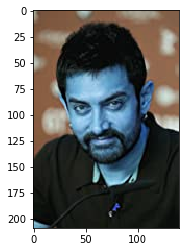

ACTOR NAME     :  Akshay Kumar
ACTOR IMAGE URL: https://m.media-amazon.com/images/M/MV5BODI4NDY1NzkyM15BMl5BanBnXkFtZTgwNzM3MDM0OTE@._V1_UY209_CR13,0,140,209_AL_.jpg
ABOUT ACTOR    : 
 Akshay Kumar, born September 9, 1967, is an actor. He studied martial arts in Hong Kong. It was a student that suggested that he try modeling. Because of his success as model, he was offered films. Along with his good looks and excellent martial art skills, he was always the first choice to do ...                


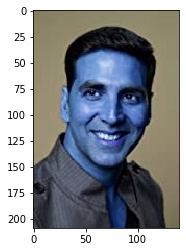

ACTOR NAME     :  Ajay Devgn
ACTOR IMAGE URL: https://m.media-amazon.com/images/M/MV5BMTY0MDY2MDMwOV5BMl5BanBnXkFtZTgwNDE4MDM0OTE@._V1_UY209_CR6,0,140,209_AL_.jpg
ABOUT ACTOR    : 
 Ajay Devgn is an Indian film actor, director, and producer. He made his film debut with Phool Aur Kaante in 1991 and received a Filmfare Award for Best Male Debut for his performance in the film. He then starred in films such as Jigar (1992), Dilwale (1994), Suhaag (1994), Naajayaz (1995), Diljale ...                


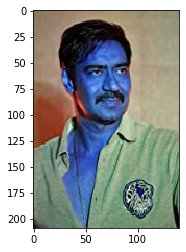

ACTOR NAME     :  Amjad Khan
ACTOR IMAGE URL: https://m.media-amazon.com/images/M/MV5BOWUzNjU3YTUtOGIyMi00MDk3LTk1NDMtMzY4MDZlNDFhNTFhXkEyXkFqcGdeQXVyMTExNDQ2MTI@._V1_UY209_CR73,0,140,209_AL_.jpg
ABOUT ACTOR    : 
 Amjad Khan was born on November 12, 1940 in Hyderabad, Hyderabad State, British India. He was an actor and director, known for Sholay (1975), Yaarana (1981) and Maa Kasam (1985). He was married to Shaila Khan. He died on July 27, 1992 in Bombay, Maharashtra, India.                


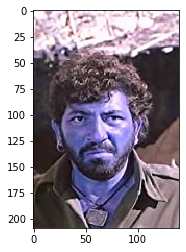

ACTOR NAME     :  Amitabh Bachchan
ACTOR IMAGE URL: https://m.media-amazon.com/images/M/MV5BNTk1OTUxMzIzMV5BMl5BanBnXkFtZTcwMzMxMjI0Nw@@._V1_UY209_CR6,0,140,209_AL_.jpg
ABOUT ACTOR    : 
 Son of well known poet Harivansh Rai Bachchan and Teji Bachchan. He has a brother named Ajitabh. He completed his education from Uttar Pradesh and moved to Bombay to find work as a film star, in vain though, as film-makers preferred someone with a fairer skin, and he was not quite fair enough. But ...                


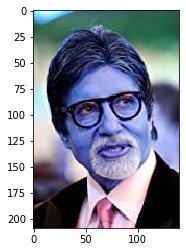

In [8]:
"""print actor's name
        actors image url
        about actor
        image of the actor
        """
for i in range(0,5):
    print("ACTOR NAME     :",df.CelebName[i])
    print("ACTOR IMAGE URL:",df.CelebImageURL[i])
    print("ABOUT ACTOR    : \n",df.Description[i])
    plt.imshow(df.CelebImage[i])
    plt.show()

### Store the dataframe in csv file

In [9]:
"""store the dataframe in csv using pandas"""

df.to_csv('Celeb_list.csv')